In [1]:
import torch

In [2]:
torch.version.__version__


'1.12.1+cu116'

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.version.cuda

'11.6'

In [5]:
#!pip install transformers datasets

### Import datasets - Hugginface library

In [6]:
#!pip install datasets

In [7]:
#!conda install -c huggingface datasets

from datasets import list_datasets

In [8]:
all_datasets = list_datasets()

In [9]:
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 8712 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


### Let's load emotion dataset

In [10]:
from datasets import load_dataset

In [11]:
emotions = load_dataset('emotion')

Using custom data configuration default
Reusing dataset emotion (/home/dawidkubicki/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

In [12]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [13]:
train_ds = emotions["train"]

In [14]:
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [15]:
len(train_ds)

16000

In [16]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [17]:
train_ds.column_names

['text', 'label']

In [18]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

### From datasets to DataFrames

In [19]:
import pandas as pd

In [20]:
emotions.set_format(type="pandas")

In [21]:
df = emotions["train"][:]

In [22]:
def label2str(row):
    return emotions["train"].features['label'].int2str(row)

In [23]:
df["label name"] = df["label"].apply(label2str)

In [24]:
df.head()

,text,label,label name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Looking at the Class Distribution

In [25]:
import matplotlib.pyplot as plt

In [26]:
# df['label name'].value_counts(ascending=True).plot().barh()
# plt.title("Frequency of classes")

### How long are the Tweets?

In [27]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)

In [28]:
df["Words Per Tweet"]

0         4
1        21
2        10
3        18
4         4
         ..
15995    24
15996    20
15997     6
15998    14
15999    15
Name: Words Per Tweet, Length: 16000, dtype: int64

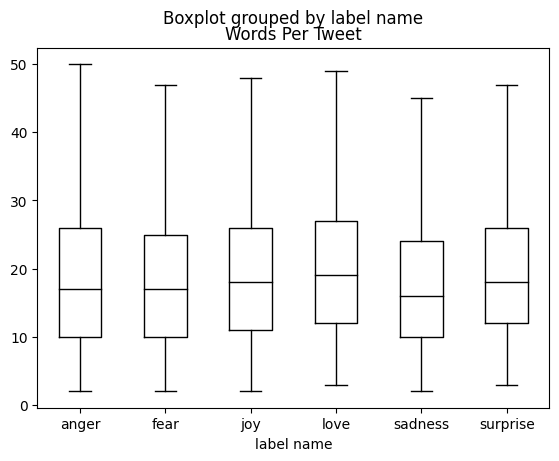

In [29]:
df.boxplot("Words Per Tweet", by="label name", grid=False, showfliers=False, color="black")
plt.show()

### Character Tokenization

In [30]:
text = "This is a sample text for Transformer neural network"

In [31]:
tokenized_text = list(text)
print(tokenized_text)

['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'a', ' ', 's', 'a', 'm', 'p', 'l', 'e', ' ', 't', 'e', 'x', 't', ' ', 'f', 'o', 'r', ' ', 'T', 'r', 'a', 'n', 's', 'f', 'o', 'r', 'm', 'e', 'r', ' ', 'n', 'e', 'u', 'r', 'a', 'l', ' ', 'n', 'e', 't', 'w', 'o', 'r', 'k']


#### Make a token2idx dictionary

In [32]:
#{key: value for (key, value) in iterable} <-> Dict comprehension
token2idx = {char: idx for (char, idx) in enumerate(sorted(tokenized_text))}

In [33]:
token2idx

{0: ' ',
 1: ' ',
 2: ' ',
 3: ' ',
 4: ' ',
 5: ' ',
 6: ' ',
 7: ' ',
 8: 'T',
 9: 'T',
 10: 'a',
 11: 'a',
 12: 'a',
 13: 'a',
 14: 'e',
 15: 'e',
 16: 'e',
 17: 'e',
 18: 'e',
 19: 'f',
 20: 'f',
 21: 'h',
 22: 'i',
 23: 'i',
 24: 'k',
 25: 'l',
 26: 'l',
 27: 'm',
 28: 'm',
 29: 'n',
 30: 'n',
 31: 'n',
 32: 'o',
 33: 'o',
 34: 'o',
 35: 'p',
 36: 'r',
 37: 'r',
 38: 'r',
 39: 'r',
 40: 'r',
 41: 'r',
 42: 's',
 43: 's',
 44: 's',
 45: 's',
 46: 't',
 47: 't',
 48: 't',
 49: 'u',
 50: 'w',
 51: 'x'}

In [34]:
token2idx

{0: ' ',
 1: ' ',
 2: ' ',
 3: ' ',
 4: ' ',
 5: ' ',
 6: ' ',
 7: ' ',
 8: 'T',
 9: 'T',
 10: 'a',
 11: 'a',
 12: 'a',
 13: 'a',
 14: 'e',
 15: 'e',
 16: 'e',
 17: 'e',
 18: 'e',
 19: 'f',
 20: 'f',
 21: 'h',
 22: 'i',
 23: 'i',
 24: 'k',
 25: 'l',
 26: 'l',
 27: 'm',
 28: 'm',
 29: 'n',
 30: 'n',
 31: 'n',
 32: 'o',
 33: 'o',
 34: 'o',
 35: 'p',
 36: 'r',
 37: 'r',
 38: 'r',
 39: 'r',
 40: 'r',
 41: 'r',
 42: 's',
 43: 's',
 44: 's',
 45: 's',
 46: 't',
 47: 't',
 48: 't',
 49: 'u',
 50: 'w',
 51: 'x'}

In [35]:
token2idx = {char: idx for (idx, char) in enumerate(sorted(set(tokenized_text)))}

In [36]:
token2idx

{' ': 0,
 'T': 1,
 'a': 2,
 'e': 3,
 'f': 4,
 'h': 5,
 'i': 6,
 'k': 7,
 'l': 8,
 'm': 9,
 'n': 10,
 'o': 11,
 'p': 12,
 'r': 13,
 's': 14,
 't': 15,
 'u': 16,
 'w': 17,
 'x': 18}

#### Make a list of indexes to the tokenized_text

In [37]:
input_ids = [token2idx[char] for char in tokenized_text]

In [38]:
print(input_ids)

[1, 5, 6, 14, 0, 6, 14, 0, 2, 0, 14, 2, 9, 12, 8, 3, 0, 15, 3, 18, 15, 0, 4, 11, 13, 0, 1, 13, 2, 10, 14, 4, 11, 13, 9, 3, 13, 0, 10, 3, 16, 13, 2, 8, 0, 10, 3, 15, 17, 11, 13, 7]


#### ONE HOT Encodings

In [39]:
import torch
import torch.nn.functional as F

In [40]:
input_ids_tensor = torch.tensor(input_ids)

In [41]:
one_hot_encoding = F.one_hot(input_ids_tensor, num_classes=len(token2idx))

In [42]:
one_hot_encoding.shape

torch.Size([52, 19])

In [43]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids_tensor[0]}")
print(f"One-hot: {one_hot_encoding[0]}")

Token: T
Tensor index: 1
One-hot: tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Word based tokenization

In [44]:
text = "This is a sample Transformer neural network input text"

In [45]:
tokenized_text = text.split()

In [46]:
print(tokenized_text)

['This', 'is', 'a', 'sample', 'Transformer', 'neural', 'network', 'input', 'text']


Goals list:

1. token2idx dictionary
2. list of indexies of tokens as list
3. one-hot encoding of that above list

In [47]:
token2idx = {idx: token for token, idx in enumerate(sorted(set(tokenized_text)))}

In [48]:
print(token2idx)

{'This': 0, 'Transformer': 1, 'a': 2, 'input': 3, 'is': 4, 'network': 5, 'neural': 6, 'sample': 7, 'text': 8}


In [49]:
input_indexies = [token2idx[token] for token in tokenized_text]

In [50]:
print(input_indexies)

[0, 4, 2, 7, 1, 6, 5, 3, 8]


In [51]:
import torch
import torch.nn.functional as F

In [52]:
tensor_input = torch.tensor(input_indexies)
one_hot_word_based = F.one_hot(tensor_input, len(tokenized_text))
print(one_hot_word_based)
print(one_hot_word_based.shape)

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1]])
torch.Size([9, 9])


### Subword Tokenization

In [53]:
from transformers import AutoTokenizer

In [54]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [55]:
from transformers import DistilBertTokenizer

In [56]:
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [57]:
encoded_text = tokenizer(text)

In [58]:
print(encoded_text)

{'input_ids': [101, 2023, 2003, 1037, 7099, 10938, 2121, 15756, 2897, 7953, 3793, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [59]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [60]:
print(text)
print(tokens)
print(tokenizer.convert_tokens_to_string(tokens))

This is a sample Transformer neural network input text
['[CLS]', 'this', 'is', 'a', 'sample', 'transform', '##er', 'neural', 'network', 'input', 'text', '[SEP]']
[CLS] this is a sample transformer neural network input text [SEP]


In [61]:
print(tokenizer.vocab_size)

30522


In [62]:
print(tokenizer.model_max_length)

512


### Tokenizing the Whole Dataset

In [63]:
emotions.reset_format()

In [64]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [65]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [66]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Loading cached processed dataset at /home/dawidkubicki/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705/cache-28a07860da8bd7c1.arrow
Loading cached processed dataset at /home/dawidkubicki/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705/cache-58887b8e23623b12.arrow
Loading cached processed dataset at /home/dawidkubicki/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705/cache-3bf5f0c4020078fd.arrow


In [67]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


### Train a classifier

#### Option 1: Do a feature extraction (use hidden states as features) and train a small or shallow classifier

In [68]:
from transformers import AutoModel

In [69]:
model_ckpt = "distilbert-base-uncased"

In [70]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [71]:
device

device(type='cuda')

In [72]:
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [73]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0): TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(i

In [74]:
text = "this is a test"

In [75]:
inputs = tokenizer(text, return_tensors="pt")

In [76]:
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [77]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [78]:
inputs = {k:v.to(device) for k,v in inputs.items()}

In [79]:
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [80]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [81]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [82]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [83]:
emotions_encoded.set_format("torch",
                           columns=["input_ids", "attention_mask", "label"])

In [84]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [85]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

### Create a feature matrix

In [86]:
import numpy as np

In [ ]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

Logistic Regression classifier

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
lr_crf = LogisticRegression(max_iter=3000)
lr_crf.fit(X_train, y_train) 

LogisticRegression(max_iter=3000)

In [91]:
lr_crf.score(X_valid, y_valid)

0.633

Dummy Classifier

In [92]:
from sklearn.dummy import DummyClassifier

In [93]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy.score(X_valid, y_valid)

0.352

Confusion Matrix

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [96]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

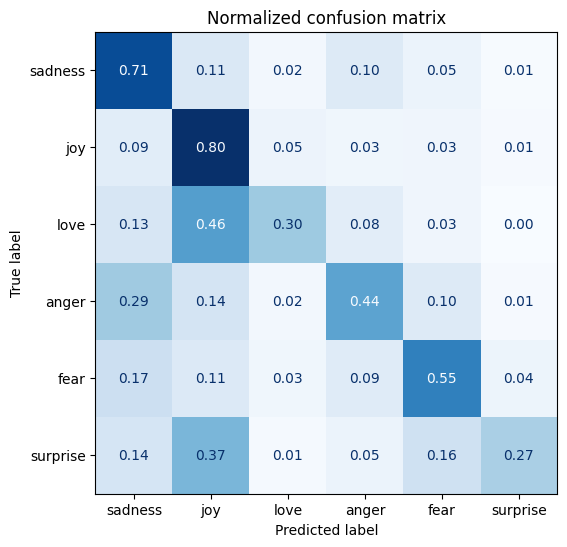

In [98]:
y_preds = lr_crf.predict(X_valid)
labels = emotions["train"].features["label"].names
plot_confusion_matrix(y_preds, y_valid, labels)